<a href="https://colab.research.google.com/github/patrickflemes/etl_python/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ciência de Dados e Big Data**

Faça o download do conjunto de dados disponível aqui:
h?ps://www.kaggle.com/datasets/yasserh/housing-prices-dataset E responda às seguintes perguntas:


a) Qual o tamanho do conjunto de dados?

b) Qual a proporção de valores ausentes em cada coluna?

c) IdenLfique qual é o Lpo de dado de cada coluna, ou seja, se a coluna é categórica ordinal, categórica nominal, numérica discreta, ou numérica conLnua.

d) Faça um gráfico de frequência que exiba o valor dos imóveis agrupados a cada 100 mil dólares.

e) Qual é a residência com o maior valor? Quais as caracterísLcas dessa residência?

f) Calcule o preço médio das residências.

g) Existe relação entre a área da residência e o valor?

Entrega:
Você pode entregar a aLvidade em formato de Jupyter Notebook (recomendado) ou arquivo Python (.py), junto com quaisquer gráficos ou visualizações produzidas durante a análise na MinhaUNO.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conjunto_dados = pd.read_csv("https://raw.githubusercontent.com/patrickflemes/etl_python/main/Housing.csv")

 # TAMANHO CONJUNTO DE DADOS

tamanho_dataset = conjunto_dados.shape[0]
print(f"Tamanho do conjunto de dados: {tamanho_dataset}")
print("\n")

Tamanho do conjunto de dados: 545




In [4]:
# PROPORÇÃO DE VALORES AUSENTES EM CADA COLUNA

proporcao_ausentes = conjunto_dados.isnull().mean().round(2)
print(f"Proporção de valores ausentes em cada coluna: \n{proporcao_ausentes}")
print("\n")

Proporção de valores ausentes em cada coluna: 
price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64




In [5]:
# TIPO DE DADOS DE CADA COLUNA

tipos_dados = conjunto_dados.dtypes
print(f"Tipo de dado de cada coluna: \n{tipos_dados}")
print("\n")

colunas_categoricas = conjunto_dados.select_dtypes(include=['object', 'category'])
print("\n")

Tipo de dado de cada coluna: 
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object






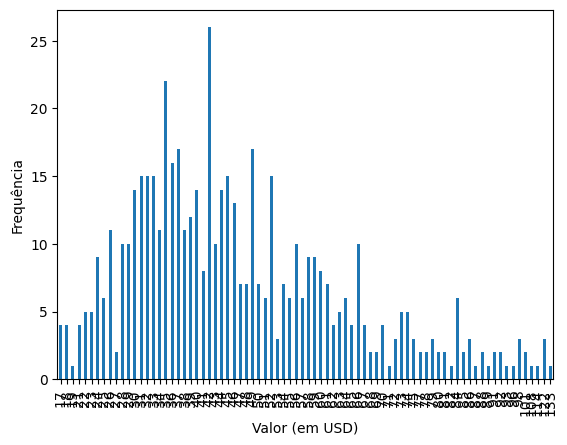

In [6]:
# FREQUÊNCIA DOS IMÓVEIS

conjunto_dados["valor_agrupado"] = (conjunto_dados["price"] / 100000).astype("int")
conjunto_dados["valor_agrupado"].value_counts().sort_index().plot.bar()
plt.xlabel("Valor (em USD)")
plt.ylabel("Frequência")
plt.show()
print("\n")

In [7]:
# RESIDÊNCIA COM O MAIOR VALOR E SUAS CARACTERÍSITCAS

residencia_mais_cara = conjunto_dados.loc[conjunto_dados["price"] == conjunto_dados["price"].max()]
print(f"Residência com o maior valor: \n\n{residencia_mais_cara}")

Residência com o maior valor: 

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   

   valor_agrupado  
0             133  


In [8]:
# PREÇO MÉDIO DAS RESIDÊNCIAS

preco_medio = conjunto_dados["price"].mean().round(2)
print("\n")
print(f"Preço médio das residências: {preco_medio}")
print("\n")



Preço médio das residências: 4766729.25




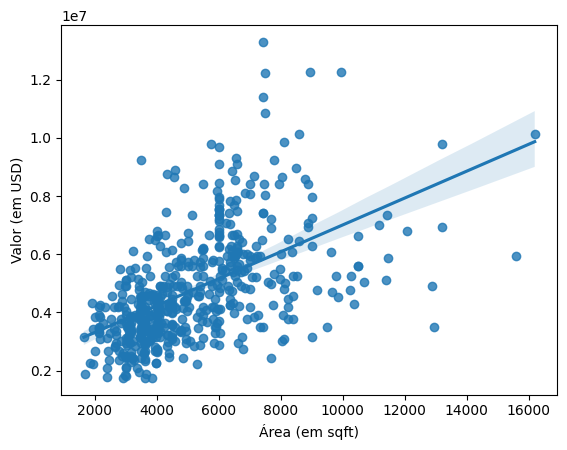

In [9]:
# ÁREA DE RESIDÊNCIA E VALOR

sns.regplot(x="area", y="price", data=conjunto_dados)
plt.xlabel("Área (em sqft)")
plt.ylabel("Valor (em USD)")
plt.show()

In [10]:
# CALCULAR COEFICIENTE DE RELAÇÃO
corr = conjunto_dados["area"].corr(conjunto_dados["price"]).round(2)
print(f"Coeficiente de correlação entre área e valor: {corr}")
print("\n")

Coeficiente de correlação entre área e valor: 0.54


